In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://bit.ly/Iris_Data')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().round(2)

In [ ]:
df.describe(include = object)

In [ ]:
df['Species'].value_counts()

In [ ]:
X = df.drop(columns = 'Species')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled = scaler.fit_transform(X)

In [ ]:
scaled = pd.DataFrame(data = scaled, columns = X.columns)
scaled

In [ ]:
scaled.describe().round(4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled = scaler.fit_transform(X)

In [ ]:
scaled = pd.DataFrame(data = scaled, columns = X.columns)
scaled

In [ ]:
scaled.describe().round(4)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
scaled = scaler.fit_transform(X)

In [ ]:
scaled = pd.DataFrame(data = scaled, columns = X.columns)
scaled

In [ ]:
scaled.describe().round(4)

In [ ]:
pd.get_dummies(data = df, 
               prefix = '품종', 
               columns = ['Species'], 
               drop_first = True, 
               dtype = int).head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(df['Species'])

In [ ]:
y = pd.Series(y)

In [ ]:
y.value_counts()

In [ ]:
df = pd.DataFrame(data = [[1, 1], [4, 5], [3, 2]], 
                  index = ['A', 'B', 'C'], 
                  columns = ['x', 'y'])
df

In [ ]:
from sklearn.metrics import DistanceMetric

In [ ]:
DistanceMetric.get_metric(metric = 'manhattan').pairwise(df)

In [ ]:
DistanceMetric.get_metric(metric = 'euclidean').pairwise(df)

In [ ]:
DistanceMetric.get_metric(metric = 'minkowski', p = 1).pairwise(df)

In [ ]:
DistanceMetric.get_metric(metric = 'minkowski', p = 2).pairwise(df)

In [ ]:
df = pd.DataFrame(
    data = [[4.8, 183, 78, 2900], 
            [4.7, 178, 82, 8500], 
            [2.8, 165, 70, 9800]], 
    index = ['A', 'B', 'C'], 
    columns = ['Like', 'Height', 'Weight', 'Salary']
)
df

In [ ]:
DistanceMetric.get_metric(metric = 'euclidean').pairwise(df)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(data = scaled, columns = df.columns)
df_scaled

In [ ]:
DistanceMetric.get_metric(metric = 'euclidean').pairwise(df_scaled)

In [ ]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *

In [ ]:
!pip install hds-stats

In [ ]:
import hds_stats as hds

In [ ]:
df = pd.read_csv('https://bit.ly/Cereal_Data')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df = df.set_index(keys = 'name')
df.head()

In [ ]:
df = df.loc[:, 'calories':'vitamins']
df.head()

In [ ]:
df.describe()

In [ ]:
from scipy.stats import zscore

In [ ]:
df.cov().round(3)

In [ ]:
df.corr().round(3)

In [ ]:
df1 = zscore(a = df, ddof = 1)

In [ ]:
df1.cov().round(3)

In [ ]:
sr1 = pd.Series(data = [1, 2, 3, 4, 5])
print(zscore(a = sr1).agg(func = ['min', 'max']))
zscore(a = sr1).quantile(q = [0, 1]).diff().iloc[-1]

In [ ]:
sr2 = pd.Series(data = [1, 2, 3, 4, 5, 100])
print(zscore(a = sr2).agg(func = ['min', 'max']))
zscore(a = sr2).quantile(q = [0, 1]).diff().iloc[-1]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df.shape[1]

In [ ]:
model = PCA(n_components = df.shape[1])

In [ ]:
score = model.fit_transform(df1)

In [ ]:
score

In [ ]:
cols = ['PC' + str(i) for i in range(1, df.shape[1]+1)]
cols

In [ ]:
score = pd.DataFrame(data = score, columns = cols)
score

In [ ]:
model.explained_variance_

In [ ]:
df1.var()

In [ ]:
score.var()

In [ ]:
model.explained_variance_.sum()

In [ ]:
model.explained_variance_ratio_

In [ ]:
model.explained_variance_ratio_[:3].sum()

In [ ]:
model.explained_variance_ratio_.sum()

In [ ]:
eigenVectors = pd.DataFrame(
    data = model.components_.T, 
    index = df.columns, 
    columns = cols
)
eigenVectors.round(4)

In [ ]:
# 함수의 코드 확인: 괄호를 생략해야 함!!!
??hds.ml.plot_screeplot

In [ ]:
hds.ml.plot_screeplot(score)

In [ ]:
plt.rc(group = 'figure', dpi = 100)

In [ ]:
hds.ml.plot_biplot(score = score, coefs = eigenVectors, zoom = 5)

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
pd.to_pickle(obj = [df, df1, score], filepath_or_buffer='Cereal.pkl')

In [ ]:
os.listdir()

In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [2]:
os.getcwd()

'C:\\Users\\KEARNEY\\Documents\\project\\code'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['APT_List.pkl', 'APT_Tidy.pkl', 'Cereal.pkl']

In [5]:
# pickle 파일을 생성한지 오래되었을 때
objs = pd.read_pickle('Cereal.pkl')
len(objs)

3

In [6]:
df, df1, score = pd.read_pickle('Cereal.pkl')

In [7]:
from scipy.cluster.hierarchy import linkage

In [8]:
hc = linkage(y = df1, 
             method = 'complete', 
             metric = 'euclidean', 
             optimal_ordering = True)

In [9]:
hc

array([[7.30000000e+01, 2.90000000e+01, 5.96428857e-02, 2.00000000e+00],
       [1.80000000e+01, 1.40000000e+01, 1.40278400e-01, 2.00000000e+00],
       [6.20000000e+01, 1.50000000e+01, 1.84138874e-01, 2.00000000e+00],
       [4.00000000e+01, 7.20000000e+01, 3.04862614e-01, 2.00000000e+00],
       [7.50000000e+01, 7.40000000e+01, 3.64666100e-01, 2.00000000e+00],
       [1.00000000e+01, 3.50000000e+01, 4.96322666e-01, 2.00000000e+00],
       [3.70000000e+01, 2.50000000e+01, 5.02630693e-01, 2.00000000e+00],
       [6.50000000e+01, 6.40000000e+01, 5.56212078e-01, 2.00000000e+00],
       [6.00000000e+01, 6.80000000e+01, 5.80849156e-01, 2.00000000e+00],
       [4.40000000e+01, 4.50000000e+01, 6.56071742e-01, 2.00000000e+00],
       [1.60000000e+01, 7.90000000e+01, 7.60654715e-01, 3.00000000e+00],
       [7.60000000e+01, 4.80000000e+01, 7.98517178e-01, 2.00000000e+00],
       [7.80000000e+01, 7.70000000e+01, 8.41557581e-01, 4.00000000e+00],
       [2.40000000e+01, 4.20000000e+01, 9.13615088e

In [10]:
from scipy.cluster.hierarchy import dendrogram

In [14]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
name,,,,,,,,,
100% Bran,70,4,1,130,10.0,5.0,6,280,25
100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0
All-Bran,70,4,1,260,9.0,7.0,5,320,25
All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25
Almond Delight,110,2,2,200,1.0,14.0,8,-1,25


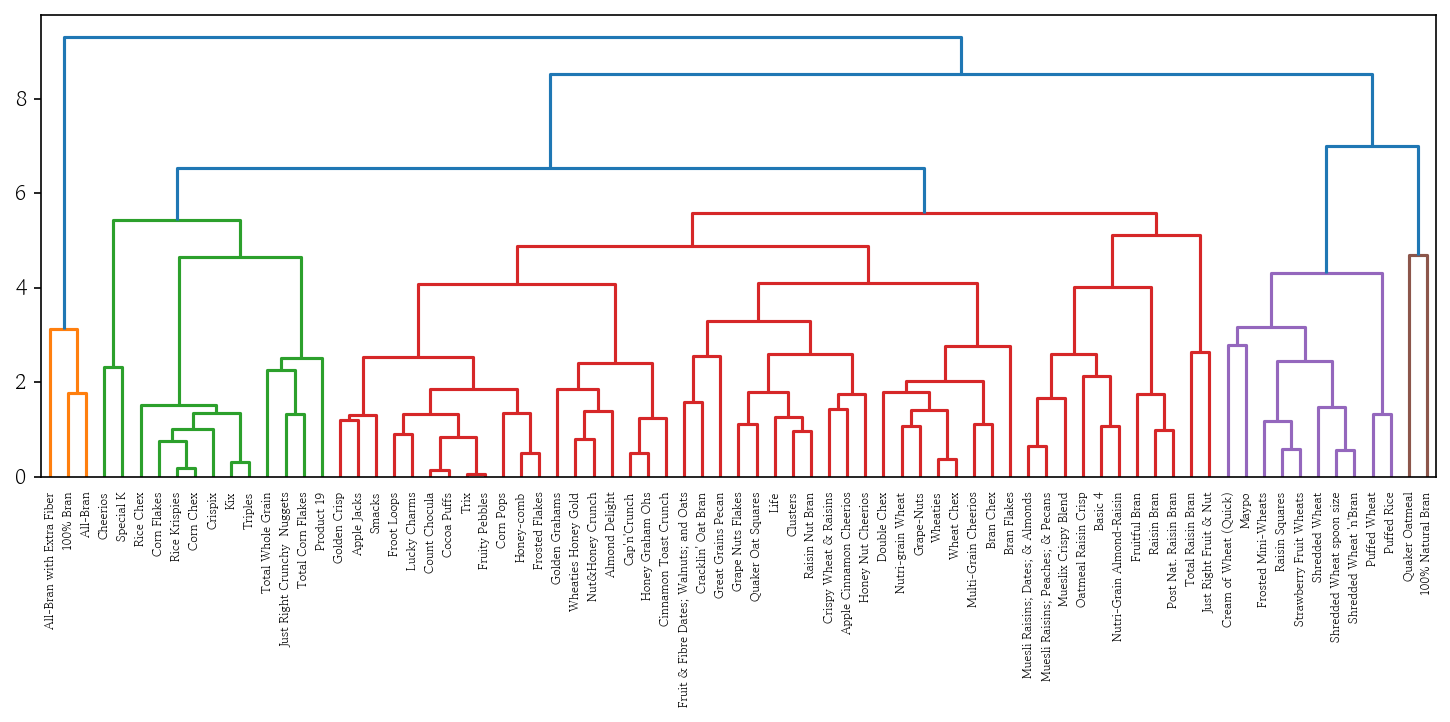

In [15]:
plt.figure(figsize = (12, 4), dpi = 150)
dendrogram(Z = hc, orientation = 'top', labels = df.index);

In [16]:
def hclust(y, method):
    hc = linkage(y = y, method = method, optimal_ordering = True)
    plt.figure(figsize = (12, 4), dpi = 150)
    dendrogram(Z = hc, labels = df.index);

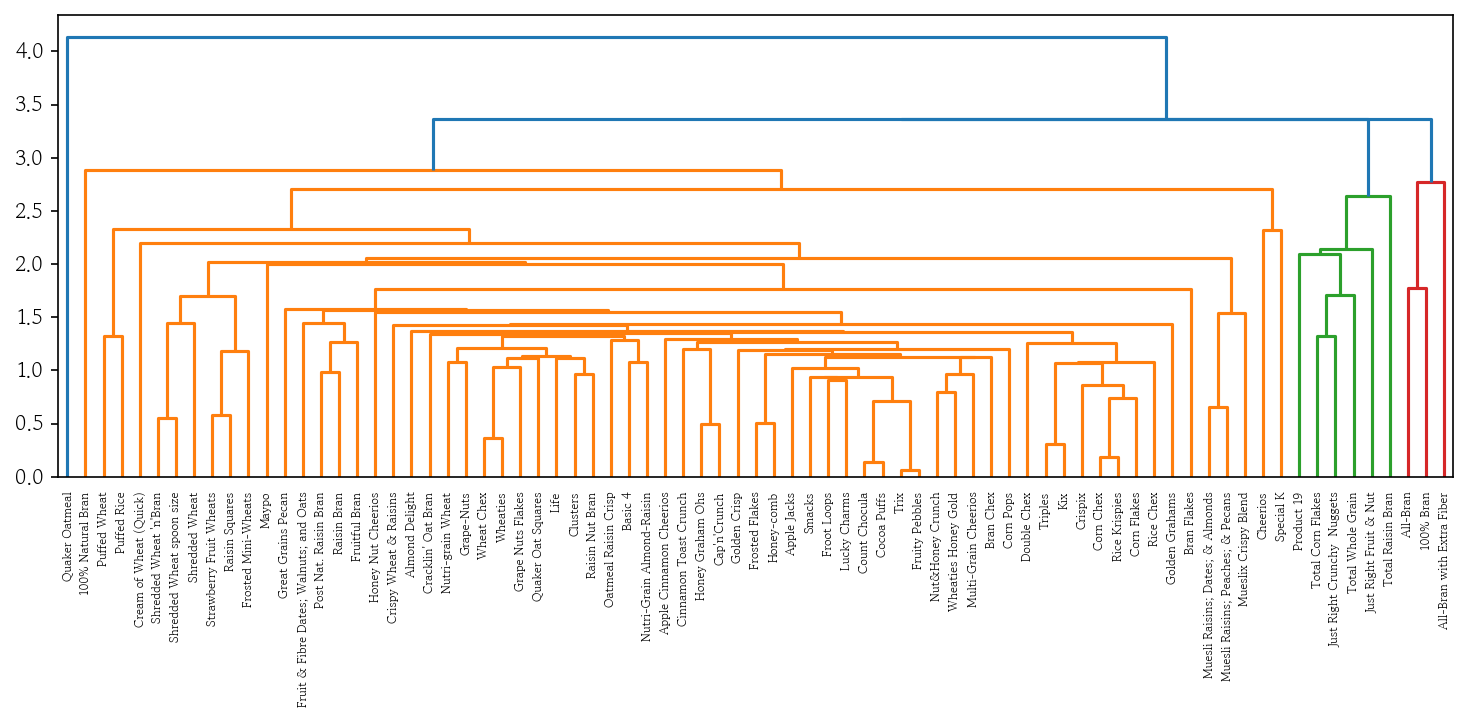

In [17]:
hclust(y = df1, method = 'single')

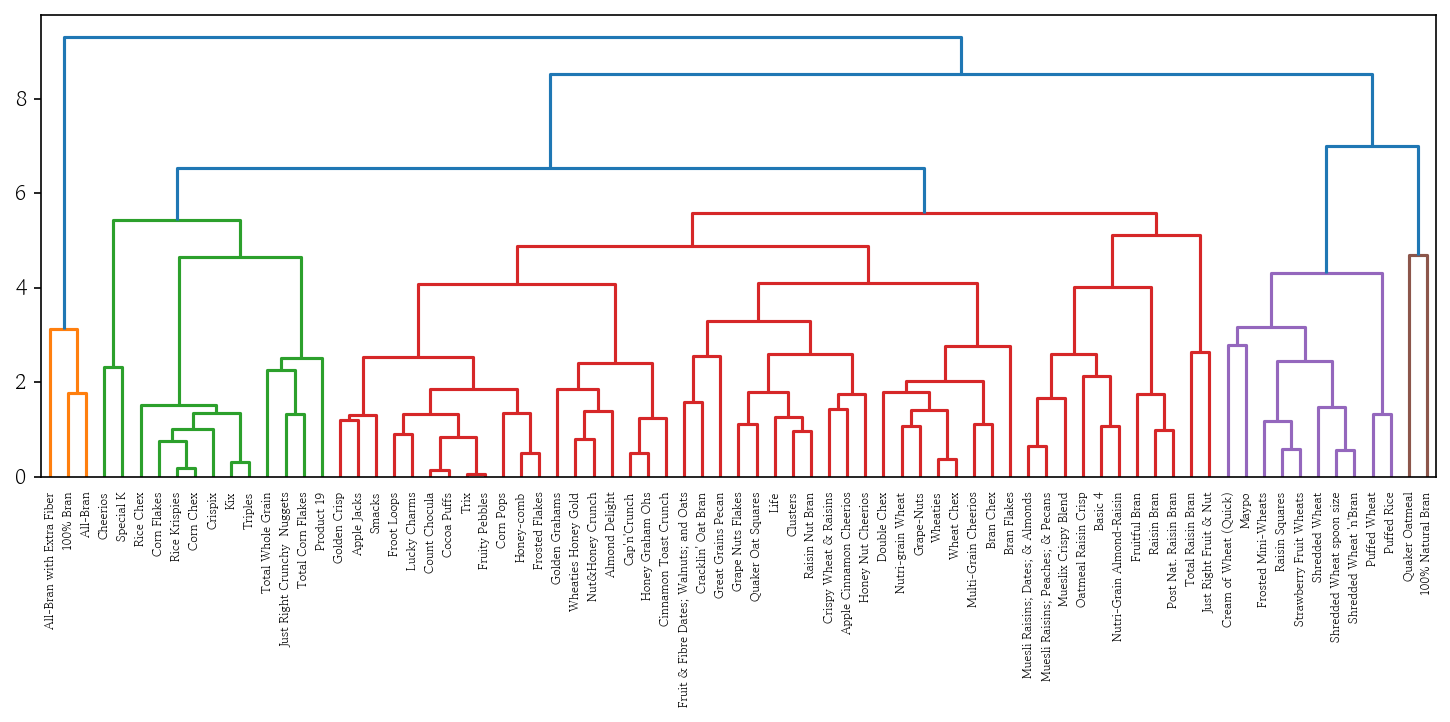

In [18]:
hclust(y = df1, method = 'complete')

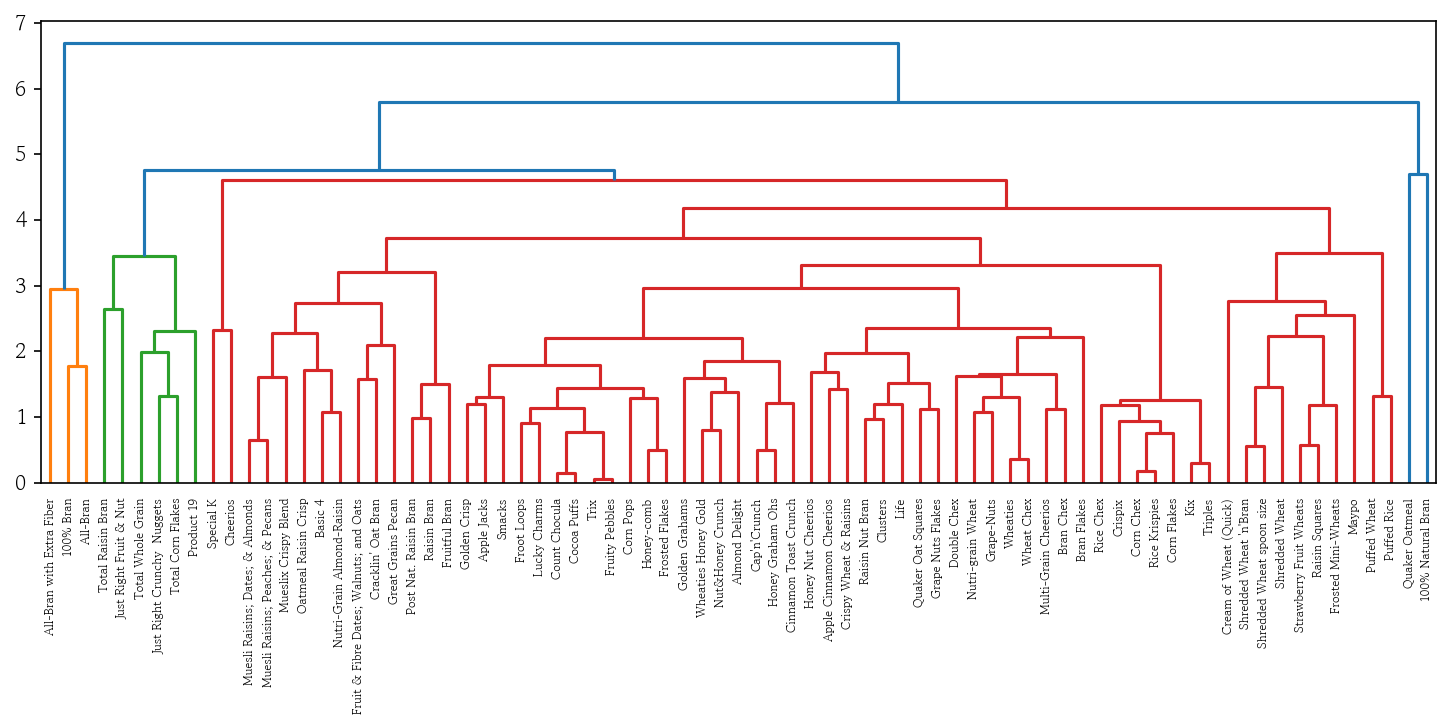

In [19]:
hclust(y = df1, method = 'average')

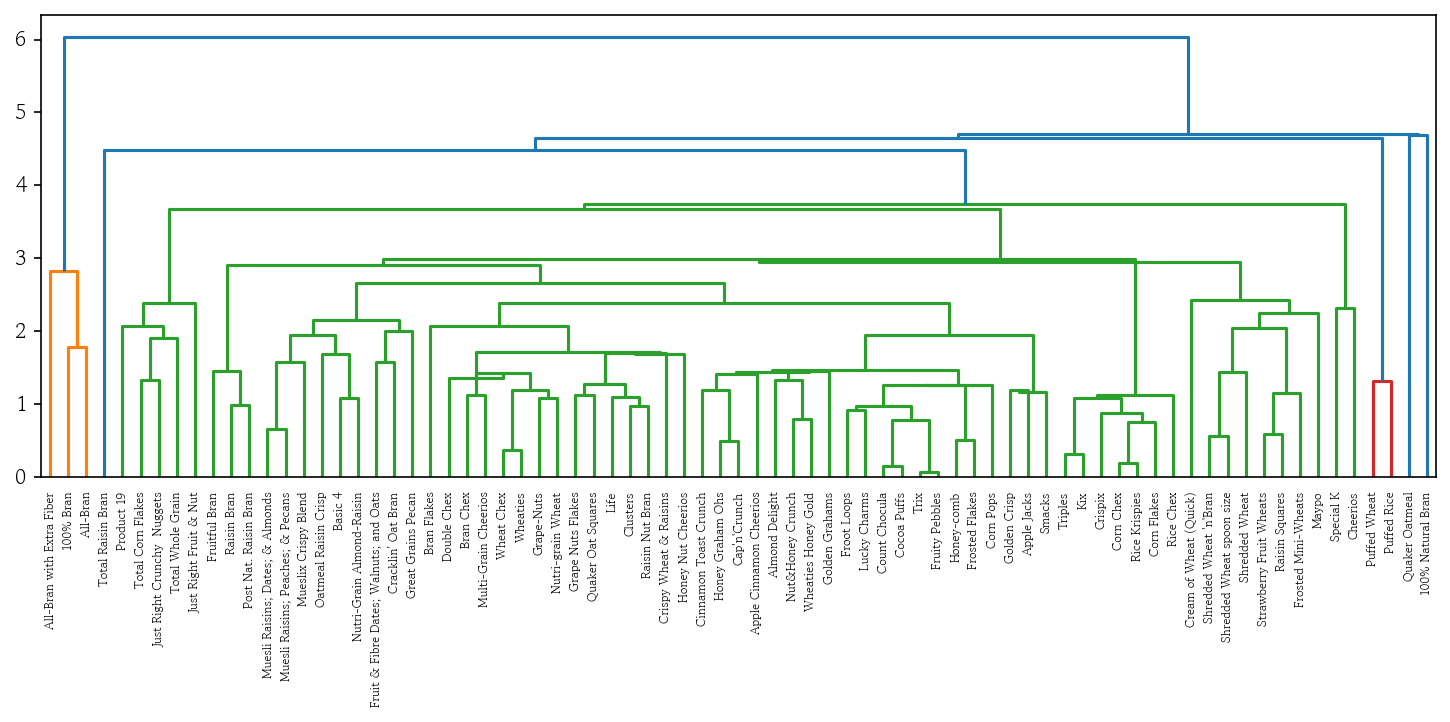

In [20]:
hclust(y = df1, method = 'centroid')

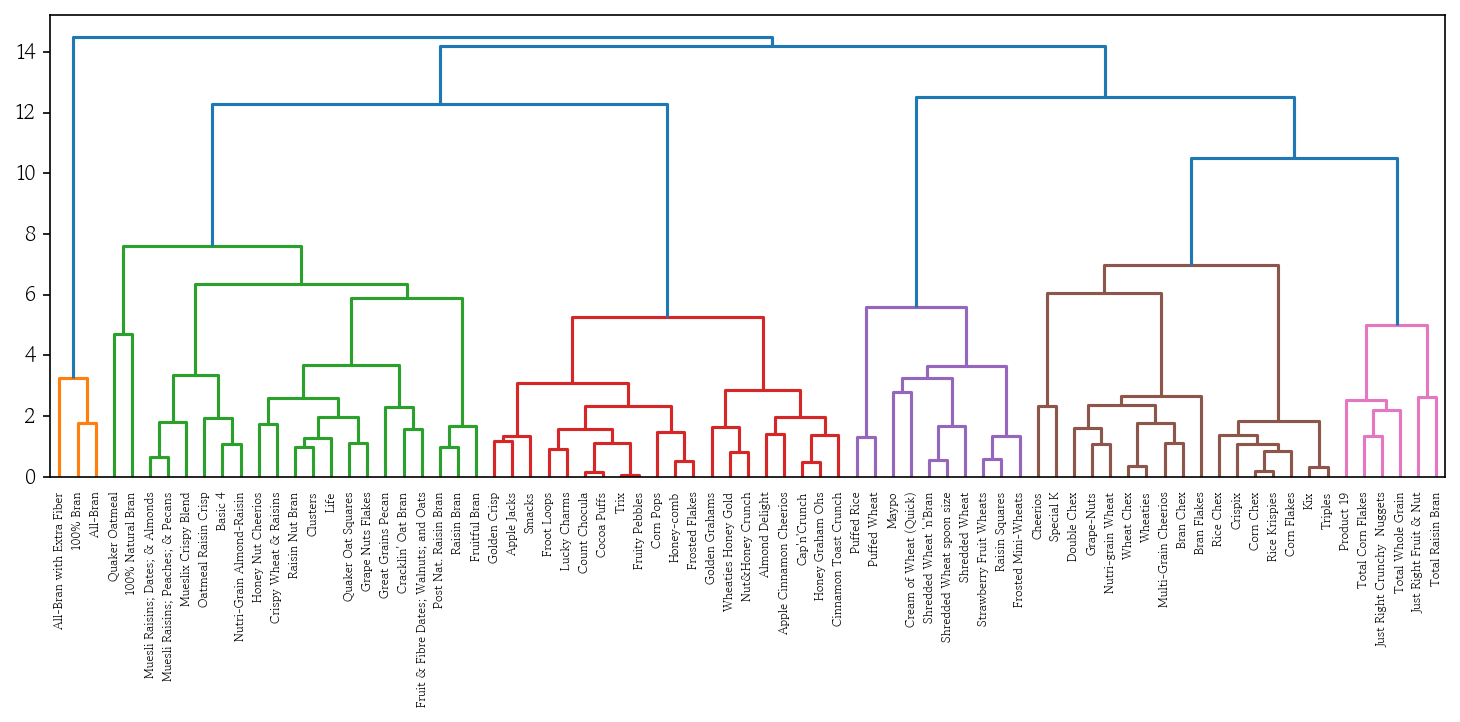

In [21]:
hclust(y = df1, method = 'ward')

In [22]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters = 6, random_state = 0)

In [24]:
model.fit(X = df1)

C:\Users\KEARNEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\KEARNEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=6, random_state=0)

In [25]:
cl1 = model.predict(df1)

In [26]:
cl1

array([1, 4, 1, 1, 0, 0, 0, 4, 2, 1, 0, 2, 0, 4, 0, 2, 2, 0, 0, 4, 5, 2,
       0, 2, 0, 0, 5, 4, 1, 0, 0, 0, 2, 2, 4, 0, 0, 0, 3, 3, 2, 4, 0, 5,
       4, 4, 4, 2, 0, 4, 2, 4, 1, 3, 5, 5, 2, 5, 1, 4, 5, 2, 2, 5, 5, 5,
       0, 2, 5, 3, 3, 3, 2, 0, 2, 2, 0])

In [27]:
model.inertia_

275.021872268522

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_score(X = df1, labels = cl1)

0.2869839044964216

In [31]:
plt.rc(group = 'figure', figsize = (4, 4), dpi = 100)

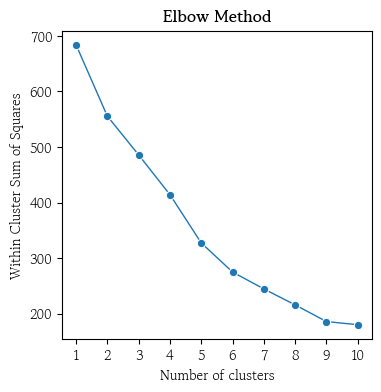

In [32]:
hds.ml.plot_wcss(X = df1, k = 10)

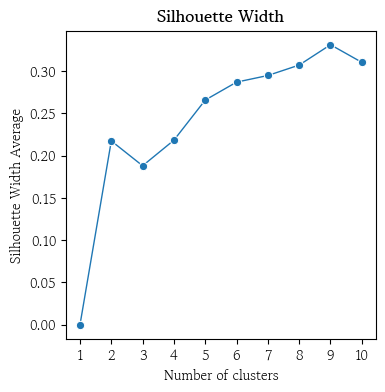

In [33]:
hds.ml.plot_silhouette(X = df1, k = 10)

In [34]:
model.set_params(n_clusters = 9).fit(X = df1)

KMeans(n_clusters=9, random_state=0)

In [35]:
df['cl1'] = model.predict(X = df1)

In [36]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,cl1
name,,,,,,,,,,
100% Bran,70,4,1,130,10.0,5.0,6,280,25,4
100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,8
All-Bran,70,4,1,260,9.0,7.0,5,320,25,4
All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,4
Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,0


In [37]:
model.inertia_

185.88082452870358

In [39]:
silhouette_score(X = df1, labels = df['cl1'])

0.3312330529412038

In [40]:
df = df.reset_index()

In [41]:
df.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,cl1
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,4
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,8
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,4
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,4
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,0


In [45]:
df.groupby(by = 'cl1').mean(numeric_only = True).round(4)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
cl1,,,,,,,,,
0,110.9091,1.5455,1.0455,170.0000,0.5909,12.5000,11.3182,45.1818,25.0000
1,124.0000,3.0000,1.0000,200.0000,5.0000,13.2000,12.4000,224.0000,40.0000
2,107.5000,1.8750,0.2500,252.5000,0.3750,21.1250,3.0000,41.8750,25.0000
3,84.0000,2.5000,0.1000,9.5000,2.0000,15.9000,2.1000,81.4000,10.0000
4,63.3333,4.0000,0.6667,176.6667,11.0000,6.6667,3.6667,310.0000,25.0000
5,100.0000,3.4545,0.7273,199.5455,2.8182,15.8182,3.9091,105.9091,25.0000
6,143.3333,3.3333,2.3333,165.8333,2.5833,16.9167,10.0000,141.6667,25.0000
7,112.0000,2.6000,0.8000,212.0000,1.4000,18.8000,4.8000,69.0000,100.0000
8,108.5714,3.4286,2.7143,94.2857,2.6000,9.3571,5.5714,120.7143,17.8571


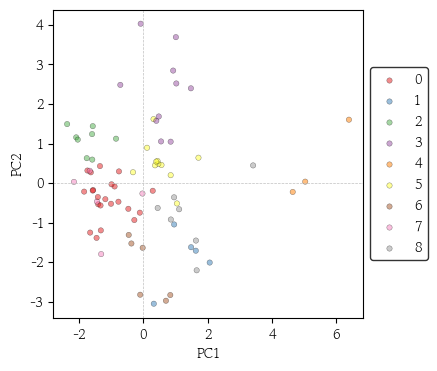

In [50]:
sns.scatterplot(data = score, x = 'PC1', y = 'PC2', hue = df['cl1'], 
                palette = 'Set1', ec = '0', s = 15, alpha = 0.5)
plt.axvline(x = 0, c = 'silver', lw = 0.5, ls = '--')
plt.axhline(y = 0, c = 'silver', lw = 0.5, ls = '--')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));